<a href="https://colab.research.google.com/github/kojiyam/denso/blob/master/denso04_Rayleigh_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ガウス分布

In [1]:
import numpy as np
np.random.seed(seed=1)
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16

In [2]:
import scipy as sp
from scipy import stats

In [3]:
N = 1000

$ \mathcal{N}(\mu, \sigma^2)$

$ X \sim \mathcal{N}(0,1/2) $ 確率変数$ X $は平均0，分散$1/2$の正規分布に従う

$X$の実現値$x_i,\ i=0,\dots,N-1$を`x`とする

In [4]:
x = np.random.normal(loc=0.0, scale=np.sqrt(1/2), size=N)

一般に確率変数の期待値$\mathbb{E}[X]$の経験量は，$$ \displaystyle \frac{1}{N}\sum_{i=0}^{N-1} x_i $$

In [5]:
np.sum(x)/N

0.027444565087095668

確率$ \mathbb{P}(X < 0) $ の経験量は $$ \frac{1}{N}\sum_{i=0}^{N-1} \mathbf{1}(x_i < 0)$$

In [6]:
np.sum(x < 0)/N

0.486

cdfの経験量（ecdf: empirical cdf）

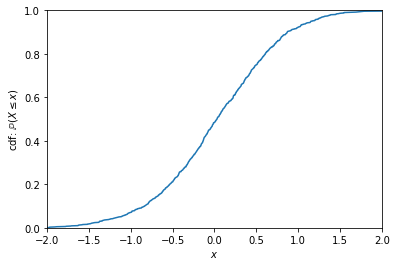

In [7]:
plt.xlabel(r"$x$")
plt.ylabel(r"cdf: $\mathbb{P}(X \leq x)$")
plt.xlim(-2,2)
plt.ylim(0,1)
plt.plot(np.sort(x), np.arange(N)/N, label="Empirical cdf")

## 理論cdfを重ねて書いてみる

正規分布の理論的cdf
$$ \mathbb{P}(X \leq x) = \frac{1}{2}\left(1+\mathrm{erf} \frac{x-\mu}{\sqrt{2s^2}} \right)$$
なお，今は$\mu=0, s^2=1/2$

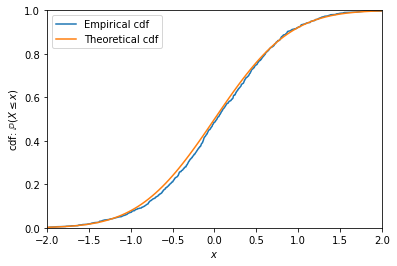

In [8]:
plt.xlabel(r"$x$")
plt.ylabel(r"cdf: $\mathbb{P}(X \leq x)$")
plt.xlim(-2,2)
plt.ylim(0,1)
plt.plot(np.sort(x), np.arange(N)/N, label="Empirical cdf")

xs = np.linspace(-2, 2, num=100)
x_cdf = (1+sp.special.erf(xs))/2
# x_cdf = stats.norm.cdf(x=xs, loc=0, scale=np.sqrt(1/2)) # これでもよい
plt.plot(xs, x_cdf, label="Theoretical cdf")
plt.legend()

# 円対称複素ガウス分布

$ X, Y \sim \mathcal{N}(0,1/2) $

$ H = X + \mathrm{j}Y \sim \mathcal{CN}(0,1) $

In [9]:
y = np.random.normal(loc=0.0, scale=np.sqrt(1/2), size=N)

$H$の実現値は，$X,Y$の実現値$x_i,y_i$を用いて，$h_i = x_i + \mathrm{j} y_i$とすればよい

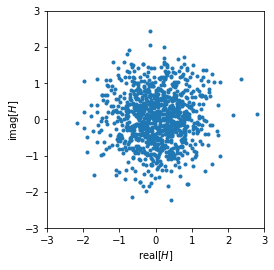

In [10]:
h = x + 1j*y
plt.axes().set_aspect('equal')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel(r"$\mathrm{real}[H]$")
plt.ylabel(r"$\mathrm{imag}[H]$")
plt.plot(np.real(h), np.imag(h), '.')

## 分散

$ \mathbb{E} [|H|^2]$

In [11]:
np.sum(np.conjugate(h)*h)/N

(1.0127996512411213+0j)

# 振幅$R=|H|$の分布はレイリー分布

In [12]:
r = abs(h)

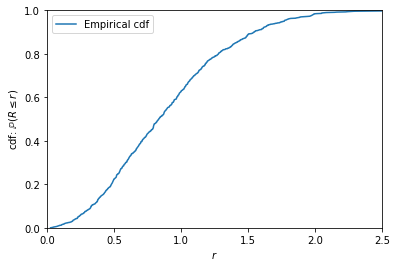

In [13]:
plt.xlabel(r"$r$")
plt.ylabel(r"cdf: $\mathbb{P}(R \leq r)$")
plt.xlim(0,2.5)
plt.ylim(0,1)
plt.plot(np.sort(r), np.arange(N)/N, label="Empirical cdf")
plt.legend()

レイリー分布の理論的cdf
$$ \mathbb{P}(R \leq r) = 1-\exp(-r^2 / 2s^2) $$
なお，今は$s^2=1/2$

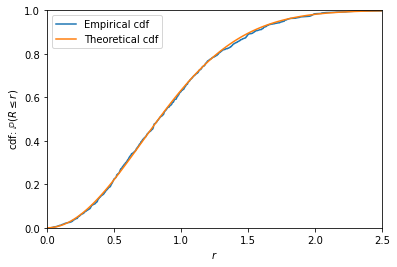

In [14]:
plt.xlabel(r"$r$")
plt.ylabel(r"cdf: $\mathbb{P}(R \leq r)$")
plt.xlim(0,2.5)
plt.ylim(0,1)
plt.plot(np.sort(r), np.arange(N)/N, label="Empirical cdf")

xs = np.linspace(0, 2.5, num=100)
R_cdf = 1-np.exp(-xs**2)
plt.plot(xs, R_cdf, label="Theoretical cdf")
plt.legend()

# 電力$G=R^2$の分布は指数分布


In [15]:
g = r**2

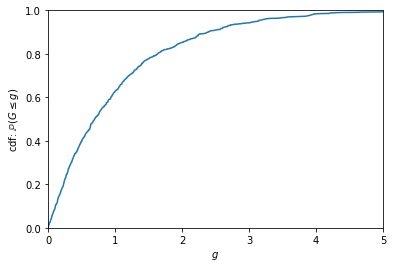

In [16]:
plt.xlabel(r"$g$")
plt.ylabel(r"cdf: $\mathbb{P}(G \leq g)$")
plt.xlim(0,5)
plt.ylim(0,1)
plt.plot(np.sort(g), np.arange(N)/N, label="Empirical cdf")

指数分布の理論的cdf
$$ \mathbb{P}(G \leq g) = 1-\exp(-g / 2s^2) $$
なお，今は$s^2=1/2$

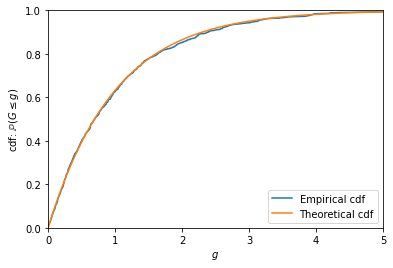

In [17]:
plt.xlabel(r"$g$")
plt.ylabel(r"cdf: $\mathbb{P}(G \leq g)$")
plt.xlim(0,5)
plt.ylim(0,1)
plt.plot(np.sort(g), np.arange(N)/N, label="Empirical cdf")

xs = np.linspace(0, 5, num=100)
G_cdf = 1-np.exp(-xs)
plt.plot(xs, G_cdf, label="Theoretical cdf")
plt.legend(loc='lower right')